https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

* Tensorflow Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [65]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# df=pd.read_csv('drive/MyDrive/Colab Notebooks/DATA/cancer_classification.csv')
df=pd.read_csv('cancer_classification.csv')

* Exploratory Data Analysis and Visualization

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,...,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,...,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,...,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,...,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,...,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,0


In [4]:
df.shape

(569, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304
mean fractal dimension,569.000,0.063,0.007,0.050,0.058,0.062,0.066,0.097


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

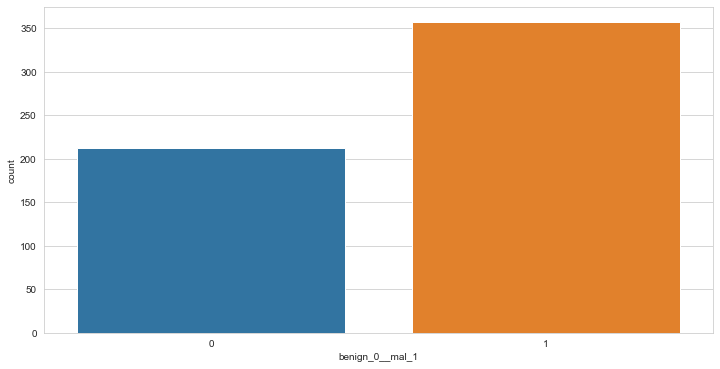

In [8]:
sns.countplot(x=df.benign_0__mal_1);

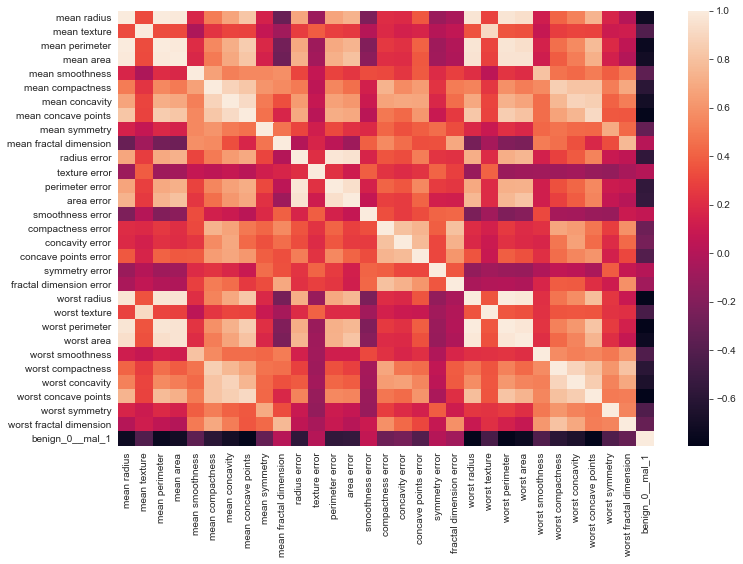

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr());

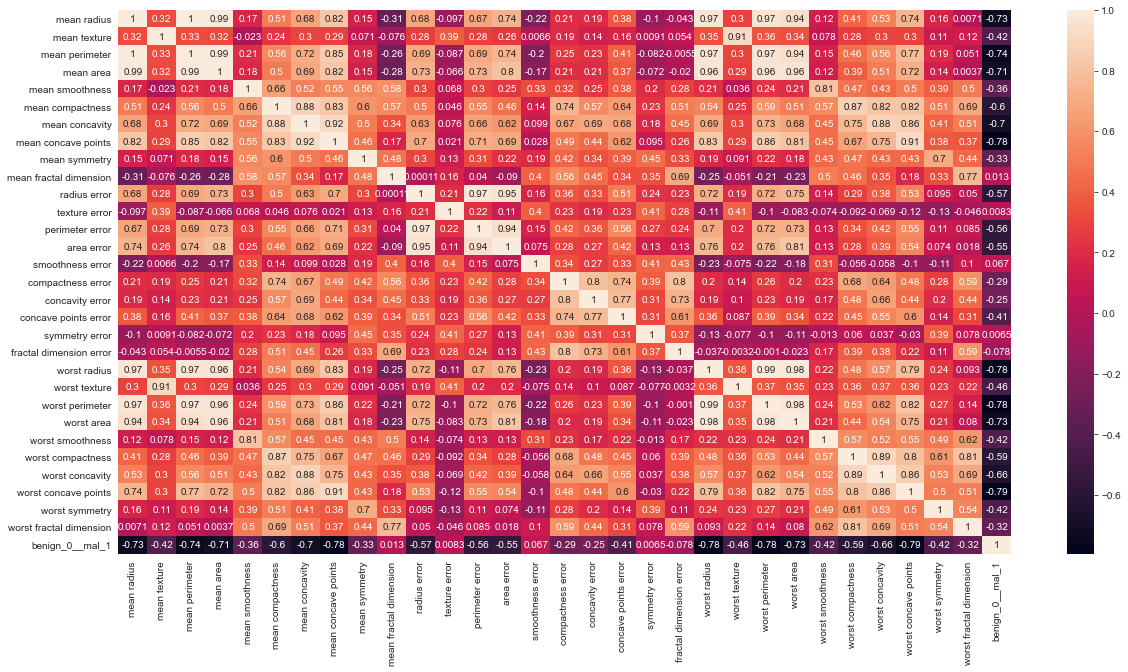

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True);

* Feature Engineering

In [11]:
drop_list = ["mean area", "mean perimeter", "worst area", "worst perimeter","perimeter error","area error"]

In [12]:
df.drop(drop_list, axis=1, inplace=True)

In [14]:
df.shape

(569, 25)

In [19]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.794
mean concave points       -0.777
worst radius              -0.776
mean radius               -0.730
mean concavity            -0.696
worst concavity           -0.660
mean compactness          -0.597
worst compactness         -0.591
radius error              -0.567
worst texture             -0.457
worst smoothness          -0.421
worst symmetry            -0.416
mean texture              -0.415
concave points error      -0.408
mean smoothness           -0.359
mean symmetry             -0.330
worst fractal dimension   -0.324
compactness error         -0.293
concavity error           -0.254
fractal dimension error   -0.078
symmetry error             0.007
texture error              0.008
mean fractal dimension     0.013
smoothness error           0.067
benign_0__mal_1            1.000
Name: benign_0__mal_1, dtype: float64

<AxesSubplot:>

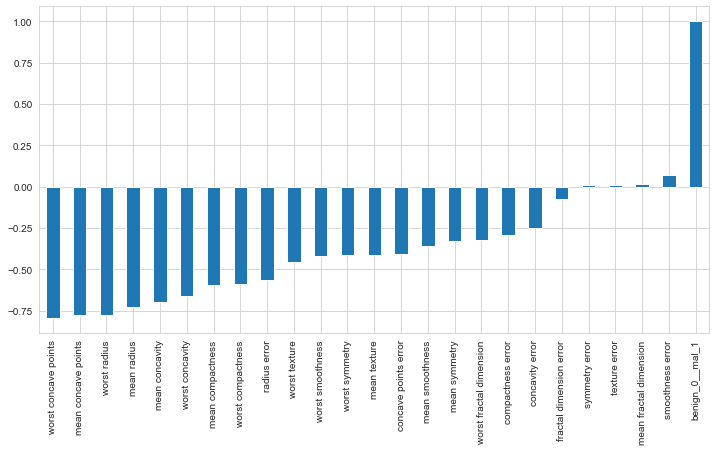

In [20]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [16]:
df.columns

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'radius error', 'texture error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'benign_0__mal_1'],
      dtype='object')

* Train Test Split

In [17]:
X = df.drop("benign_0__mal_1", axis=1).values
y = df.benign_0__mal_1.values

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

* Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Creating the Model

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [26]:
X_train.shape

(426, 24)

In [27]:
model = Sequential()

model.add(Dense(units=24,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [28]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/500
14/14 [==============================] - 0s 7ms/step - loss: 0.6869 - val_loss: 0.6643
Epoch 2/500
14/14 [==============================] - 0s 1ms/step - loss: 0.6601 - val_loss: 0.6484
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6436 - val_loss: 0.6307
Epoch 4/500
14/14 [==============================] - 0s 1ms/step - loss: 0.6185 - val_loss: 0.5942
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5797 - val_loss: 0.5572
Epoch 6/500
14/14 [==============================] - 0s 1ms/step - loss: 0.5404 - val_loss: 0.5161
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5009 - val_loss: 0.4765
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4620 - val_loss: 0.4389
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4253 - val_loss: 0.4021
Epoch 10/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3896 - val_loss: 0.3683
Epoch 11/

In [30]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

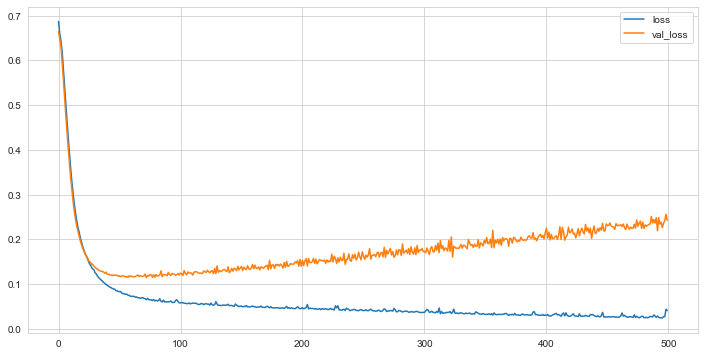

In [31]:
model_loss.plot()

* Early Stopping

In [32]:
model = Sequential()
model.add(Dense(units=24,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=25)

In [97]:
#The patience is often set somewhere between 10 and 100 (10 or 20 is more common), 
#but it really depends on your dataset and network.

In [36]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0538 - val_loss: 0.1015
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.1060
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0994
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.1050
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.1018
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.1043
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.1046
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.1045
Epoch 9/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0515 - val_loss: 0.1036
Epoch 10/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0502 - val_loss: 0.1066
Epoch 11/

<AxesSubplot:>

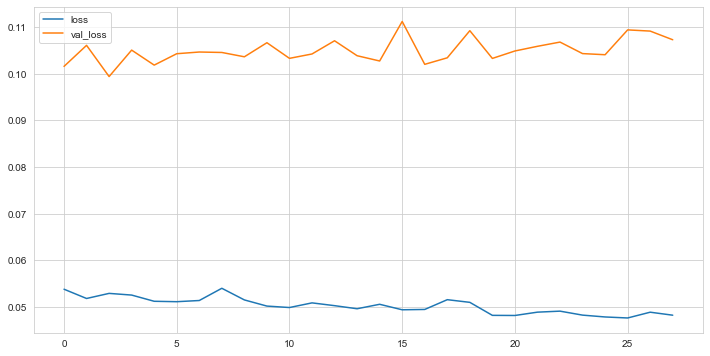

In [37]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

* Dropout Layers

In [38]:
from tensorflow.keras.layers import Dropout

* Model Evaluation

* Making Predictions

* Comparison with ML

In [ ]:
from sklearn.ensemble import RandomForestClassifier